# Facebook Stocks

### Loading Packages:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import csv

### Loading Datasets (Clean and Merge Data):

In [2]:
# Facebook stock prices 2012-2022
FB_dataframe = pd.read_csv ('./data/FB_stock_history.csv')
FB_dataframe = FB_dataframe.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'], axis=1)
FB_dataframe = FB_dataframe.rename(columns={'Close': 'FB Close'})
FB_dataframe['Date'] = pd.to_datetime(FB_dataframe['Date'])

In [3]:
# Facebook MAU 2008-2022
# (https://www.statista.com/statistics/264810/number-of-monthly-active-facebook-users-worldwide/)
MAU_datafame = pd.read_csv ('./data/FB_MAU.csv')
MAU_datafame['Date'] = pd.to_datetime(MAU_datafame['Date'])
MAU_datafame.head()

# Add MAU to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, MAU_datafame, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB MAU (millions)'] = temp['MAU (millions)']

In [4]:
# Major social media stock prices 2012-2022
# (https://www.kaggle.com/datasets/prasertk/major-social-media-stock-prices-20122022)
sm_dataframe = pd.read_csv ('./data/social_media_stock.csv')
sm_dataframe['Date'] = pd.to_datetime(sm_dataframe['Date'])

# Add Major social media stock prices to Main FB_dataframe
copanies = ['TWTR', 'SNAP'] # Twitter, Snapchat
for company in copanies:
    company_df = sm_dataframe[sm_dataframe['Symbol']==company]
    temp = pd.merge_asof(FB_dataframe, company_df, on='Date', tolerance=pd.Timedelta('7 days'))
    FB_dataframe[company+' Close'] = temp['Close']

In [5]:
# Apple and Google Stock Price 
# (https://www.kaggle.com/datasets/vainero/google-apple-facebook-stock-price)
apple_dataframe = pd.read_csv ('./data/Apple_stock.csv')
apple_dataframe['Date'] = pd.to_datetime(apple_dataframe['Date'])
google_dataframe = pd.read_csv ('./data/Google_stock.csv')
google_dataframe['Date'] = pd.to_datetime(google_dataframe['Date'])

# Add Apple and Google Stocks to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, apple_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('7 days'))
FB_dataframe['Apple Close'] = temp['Close']
temp = pd.merge_asof(FB_dataframe, google_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('7 days'))
FB_dataframe['Google Close'] = temp['Close']

In [6]:
# Facebook Net Income and Lobbying Expense
# (https://www.statista.com/statistics/223289/facebooks-quarterly-net-income/?locale=en)
# (https://www.statista.com/statistics/236969/quarterly-lobbying-expenses-of-facebook/?locale=en)
income_dataframe = pd.read_csv ('./data/FB_income.csv')
income_dataframe['Date'] = pd.to_datetime(income_dataframe['Date'])
lobbying_dataframe = pd.read_csv ('./data/FB_lobbying.csv')
lobbying_dataframe['Date'] = pd.to_datetime(lobbying_dataframe['Date'])

# Add Apple and Google Stocks to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, income_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB Net Income (millions)'] = temp['net income (millions)']
temp = pd.merge_asof(FB_dataframe, lobbying_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB Lobbying (millions)'] = temp['lobbying expense (millions)']

In [7]:
#Datetime
FB_dataframe.dropna(inplace=True)
FB_dataframe['ordinal'] = FB_dataframe['Date'].apply(lambda x: x.toordinal())

FB_dataframe

,Date,FB Close,FB MAU (millions),TWTR Close,SNAP Close,Apple Close,Google Close,FB Net Income (millions),FB Lobbying (millions),ordinal
1330,2017-08-31,171.970001,2072,16.910000,14.510000,40.314999,46.797501,4707,2.85,736572
1331,2017-09-01,172.020004,2072,16.860001,14.270000,40.314999,46.797501,4707,2.85,736573
1332,2017-09-05,170.720001,2072,16.650000,14.490000,40.314999,46.797501,4707,2.85,736577
1333,2017-09-06,172.089996,2072,16.830000,14.500000,40.314999,46.797501,4707,2.85,736578
1334,2017-09-07,173.210007,2072,17.219999,15.150000,40.314999,46.797501,4707,2.85,736579
...,...,...,...,...,...,...,...,...,...,...
2354,2021-09-27,353.579987,2910,65.370003,80.080002,145.369995,141.501007,9194,5.09,738060
2355,2021-09-28,340.649994,2910,62.450001,74.419998,141.910004,136.184006,9194,5.09,738061
2356,2021-09-29,339.609985,2910,60.070000,71.760002,142.830002,134.520996,9194,5.09,738062
2357,2021-09-30,339.390015,2910,60.389999,73.870003,141.500000,133.265503,9194,5.09,738063


### Basic Plots

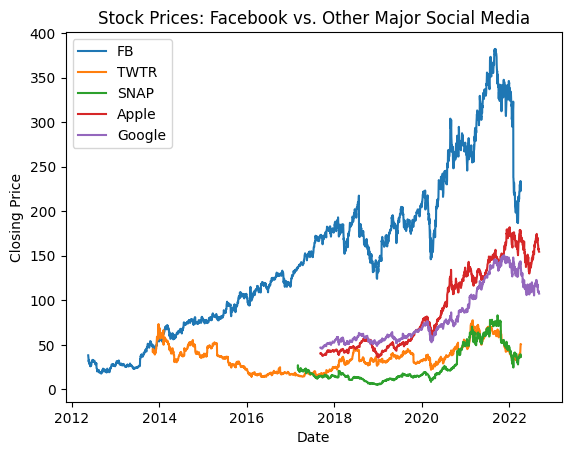

In [8]:
# Closing prices of Facebook vs Other Companies (2012-2022)
copanies = ['FB', 'TWTR', 'SNAP']
for company in copanies:
    company_df = sm_dataframe[sm_dataframe['Symbol']==company]
    plt.plot(company_df['Date'], company_df['Close'], label=company)
plt.plot(apple_dataframe['Date'], apple_dataframe['Close'], label='Apple')
plt.plot(google_dataframe['Date'], google_dataframe['Close'], label='Google')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Prices: Facebook vs. Other Major Social Media')
plt.legend()
plt.show()

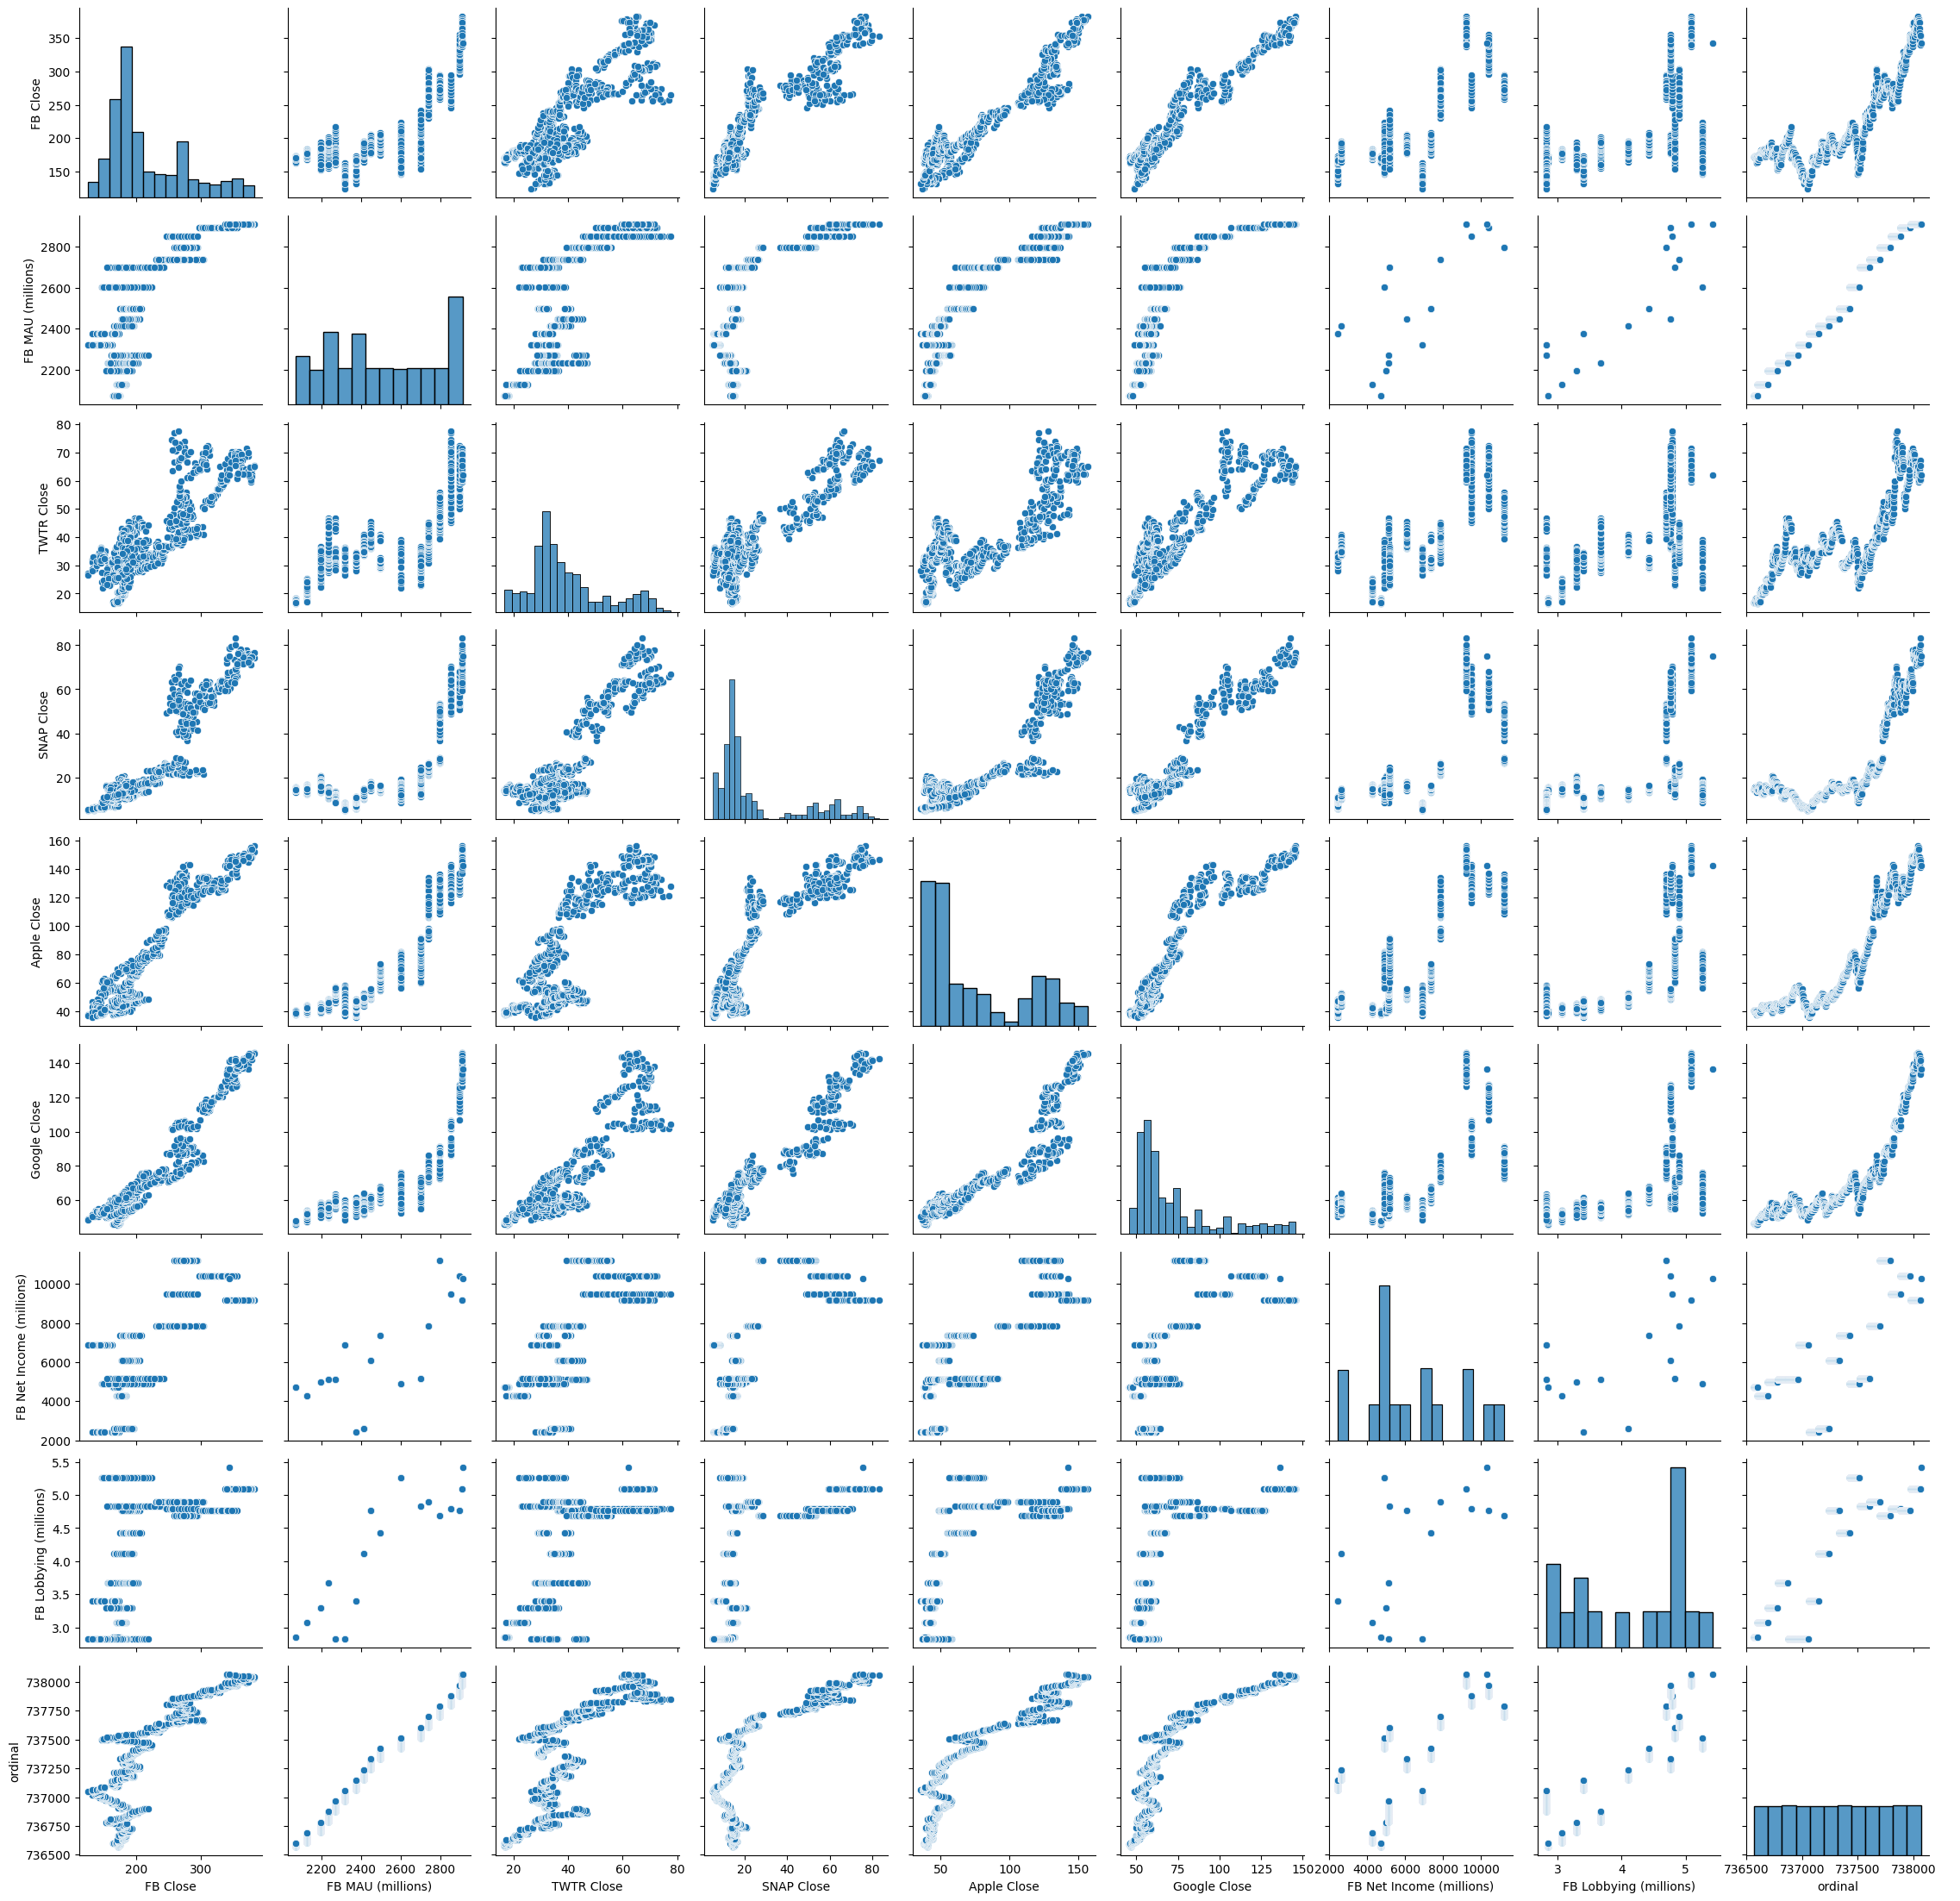

In [9]:
i = sns.PairGrid(FB_dataframe)
i.map_diag(sns.histplot)
i.map_offdiag(sns.scatterplot)
i.add_legend()

### Train Model and Predict

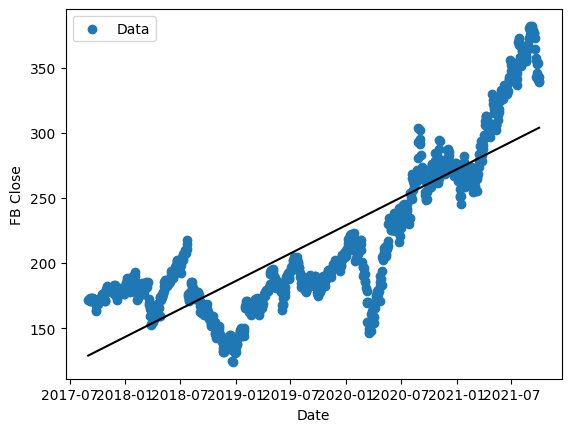

In [28]:
# Simple Linear Regression using FB Closing Price vs. Datetime
# (https://www.w3schools.com/python/python_ml_multiple_regression.asp)
from sklearn import linear_model
import datetime as dt

X = FB_dataframe[['ordinal']]
y = FB_dataframe['FB Close']

regr = linear_model.LinearRegression()
regr.fit(X.values, y.values)
# plot data
fig, ax = plt.subplots()
ax.scatter(FB_dataframe['Date'], FB_dataframe['FB Close'], label='Data')
ax.set_xlabel('Date')
ax.set_ylabel('FB Close')
ax.legend()

# plot pred
date_range = pd.date_range(start='2017-08-31', end='2021-10-01', freq='D')
ordinal_range = date_range.to_series().apply(lambda date: date.toordinal())
y_pred = regr.predict(ordinal_range.to_numpy().reshape(-1, 1))
ax.plot(date_range, y_pred, color='k')

plt.show()

### Evaluate Accuracy